In [1]:
from LABNET import Teacher

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch
from collections import OrderedDict
from torch.utils.data import DataLoader, TensorDataset

In [3]:
import matplotlib.pyplot as plt

def plot_losses(losses, plot_size=(10, 5)):
    """
    Plot a list of losses and adjust the shape of the plot.

    Args:
        losses (list): List of loss values to be plotted.
        plot_size (tuple): Tuple specifying the size of the plot (width, height).

    Returns:
        None
    """
    # Set the plot size based on the provided tuple
    plt.figure(figsize=plot_size)
    
    # Create a line plot of the losses
    plt.plot(losses, label='Loss', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()
    
    # Show the plot
    plt.show()

In [4]:



layer_sizes = [8, 7,7,4]  # Inputs: 4, Hidden layers: [8, 8], Outputs: 3
teacher = Teacher(layer_sizes)



In [5]:
teacher.configure()

In [74]:
n = 5000 #number of samples to generate
teacher.generate_data(
    "train"
    ,n
    ,'normal'
    , m =0.0
    , std=1.0
)

In [75]:
teacher.train_inputs.shape

torch.Size([5000, 8])

In [40]:
teacher.generate_data(
    "val"
    ,n
    ,'normal'
    , m =0.0
    , std=1.0
)

In [9]:
teacher.val_inputs.shape

torch.Size([1000, 8])

In [10]:
teacher.model.state_dict()
#torch.save(neural_network.model.state_dict(), 'model_weights.pth')

OrderedDict([('input_layer.weight',
              tensor([[-0.2685,  0.8859,  0.8453,  0.1376,  0.1067, -0.1534, -0.7289, -0.3879],
                      [-0.2706, -0.7018, -0.7226, -0.3428, -0.6257,  0.5451, -0.0239,  0.0636],
                      [ 0.6384,  0.2154,  0.2109,  0.6804,  0.5108,  0.7057,  0.3650, -0.4178],
                      [-0.8420,  0.5969, -0.2049, -0.2292,  0.1156, -0.6433, -0.1723,  0.1928],
                      [-0.7356, -0.6396, -0.1602, -0.9215, -0.8370, -0.1366, -0.1885,  0.0233],
                      [-0.5281, -0.2045, -0.4417,  0.6336,  0.4270,  0.4065,  0.5916, -0.1770],
                      [ 0.2130,  0.0605, -0.4692,  0.3677,  0.3012,  0.8198,  0.6837, -0.5773]])),
             ('input_layer.bias',
              tensor([ 0.8861, -0.9418,  0.1741,  0.5869, -0.8277, -0.1430, -0.5004])),
             ('hidden_layer_2.weight',
              tensor([[-0.6459, -0.2665, -0.4174, -0.3728, -0.0285,  0.5091, -0.2112],
                      [-0.0834,  0.4081, 

In [11]:
# Define the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = nn.Linear(8, 7) ##make these all variables duh
        self.hidden_2 = nn.Linear(7,7)
        #self.hidden_3 = nn.Linear(7,7)
        #self.hidden_4 = nn.Linear(7,7)
        #self.hidden_5 = nn.Linear(7,7)
        self.output = nn.Linear(7, 4)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.hidden_1(x))
        x = self.relu(self.hidden_2(x))
        #x = self.relu(self.hidden_3(x))
        #x = self.relu(self.hidden_4(x))
        #x = self.relu(self.hidden_5(x))
        x = self.output(x)
        return x

In [12]:
student = MyModel()
print(student)

MyModel(
  (hidden_1): Linear(in_features=8, out_features=7, bias=True)
  (hidden_2): Linear(in_features=7, out_features=7, bias=True)
  (output): Linear(in_features=7, out_features=4, bias=True)
  (relu): ReLU()
)


In [13]:
##STARTING with the right answuers gives some close to zero row_comp:3.5974587e-08,0.0,0.0; 0.0,2.9802322e-08,1.4901161e-08
#interesting that you get a zero, and then a close to zero.  
#perturb_weights(mymodel, std_dev = 0.005) # converges
#perturb_weights(mymodel, std_dev = 0.009) # converges
#perturb_weights(mymodel, std_dev = 0.05) doesn't converge
#perturb_weights(mymodel, std_dev = 0.01) #converges
#perturb_weights(mymodel, std_dev = 0.01) #not converging well, even with lower lr, 0.003. 1t 0.001


# scale_weights(mymodel, scaling_factor = 1.1) ## converges, weights cross.  
#scale_weights(mymodel, scaling_factor = 1.5) ## good validation, non zero row comapre still..

#scale_weights(mymodel, scaling_factor = 2) ## good validation, row compare stays pretty close to the same...
## scale_weights(mymodel, scaling_factor = 1.05) row compare barely improves!!
student.state_dict()

OrderedDict([('hidden_1.weight',
              tensor([[ 0.0261, -0.1803, -0.1835, -0.0022,  0.3498, -0.0219, -0.3040, -0.2963],
                      [-0.0253,  0.0696,  0.0815,  0.0961,  0.1914,  0.0915, -0.2108,  0.0775],
                      [ 0.0894, -0.1965,  0.0011,  0.0871,  0.2346, -0.2584, -0.0102, -0.3396],
                      [-0.2129,  0.2800,  0.1268,  0.1962, -0.0364,  0.1462, -0.0087,  0.1570],
                      [ 0.1836,  0.2714,  0.2308,  0.1218,  0.2178,  0.2330, -0.2377, -0.2910],
                      [-0.0975,  0.0201, -0.0626, -0.2492, -0.1789, -0.2390,  0.1107, -0.2806],
                      [ 0.2416,  0.2134,  0.2354, -0.3008,  0.2151, -0.1389,  0.3268, -0.1826]])),
             ('hidden_1.bias',
              tensor([-0.2479, -0.1179, -0.0390, -0.0922,  0.2630, -0.0707, -0.0029])),
             ('hidden_2.weight',
              tensor([[-0.0184,  0.2084,  0.0397, -0.1375, -0.1825,  0.3268, -0.2715],
                      [ 0.2183,  0.2533,  0.1893,  0.

In [14]:
# Training loop
num_epochs = 100
batch_size = 32
learning_rate = 0.001

criterion = nn.MSELoss()
optimizer = optim.Adam(student.parameters(), lr=learning_rate)

In [76]:
data = list(zip(teacher.train_inputs, teacher.train_targets))
input_tensors = torch.stack([torch.Tensor(x[0]) for x in data])
target_tensors = torch.stack([torch.Tensor(x[1]) for x in data])
dataset = TensorDataset(input_tensors, target_tensors)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [77]:


losses = []  # List to store losses

for epoch in range(num_epochs):
    total_loss = 0
    for input_batch, target_batch in dataloader:
        optimizer.zero_grad()  # Zero the gradients
        output = student(input_batch)  # Forward pass
        loss = criterion(output, target_batch)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
        total_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = total_loss / len(dataloader)
    losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/100], Loss: 0.0044
Epoch [2/100], Loss: 0.0043
Epoch [3/100], Loss: 0.0042
Epoch [4/100], Loss: 0.0042
Epoch [5/100], Loss: 0.0042
Epoch [6/100], Loss: 0.0042
Epoch [7/100], Loss: 0.0041
Epoch [8/100], Loss: 0.0041
Epoch [9/100], Loss: 0.0041
Epoch [10/100], Loss: 0.0041
Epoch [11/100], Loss: 0.0041
Epoch [12/100], Loss: 0.0041
Epoch [13/100], Loss: 0.0041
Epoch [14/100], Loss: 0.0040
Epoch [15/100], Loss: 0.0040
Epoch [16/100], Loss: 0.0041
Epoch [17/100], Loss: 0.0040
Epoch [18/100], Loss: 0.0040
Epoch [19/100], Loss: 0.0040
Epoch [20/100], Loss: 0.0040
Epoch [21/100], Loss: 0.0040
Epoch [22/100], Loss: 0.0040
Epoch [23/100], Loss: 0.0040
Epoch [24/100], Loss: 0.0040
Epoch [25/100], Loss: 0.0040
Epoch [26/100], Loss: 0.0040
Epoch [27/100], Loss: 0.0040
Epoch [28/100], Loss: 0.0040
Epoch [29/100], Loss: 0.0040
Epoch [30/100], Loss: 0.0040
Epoch [31/100], Loss: 0.0039
Epoch [32/100], Loss: 0.0039
Epoch [33/100], Loss: 0.0040
Epoch [34/100], Loss: 0.0039
Epoch [35/100], Loss: 0

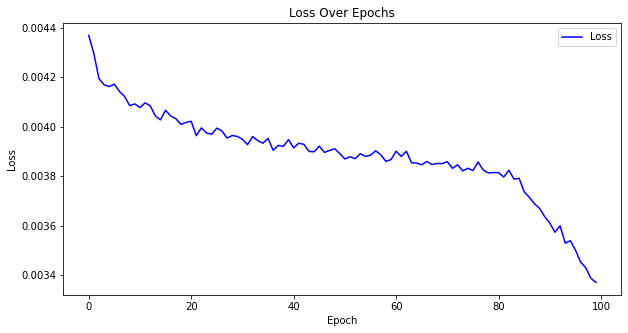

In [78]:
plot_losses(losses, plot_size=(10, 5))

In [79]:
v_batch_size = 10
val_data = list(zip(teacher.val_inputs, teacher.val_targets))
val_input_tensors = torch.stack([torch.Tensor(x[0]) for x in val_data])
val_target_tensors = torch.stack([torch.Tensor(x[1]) for x in val_data])
val_dataset = TensorDataset(val_input_tensors, val_target_tensors)
val_dataloader = DataLoader(val_dataset, batch_size=v_batch_size, shuffle=True)

In [80]:
student.eval()

differences = []

with torch.no_grad():
    for val_batch in val_dataloader:
        val_inputs, val_targets = val_batch
        #val_inputs, val_targets = val_inputs\, val_targets.to(device)  # If you are using GPU, move data to the GPU
        # Forward pass
        val_outputs = student(val_inputs)
        
        # Calculate the absolute differences between predicted and actual values
        diff = val_outputs - val_targets
        
        # Extend the list of differences
        differences.extend(diff.cpu().numpy().flatten())  # Convert to NumPy for histogram plotting

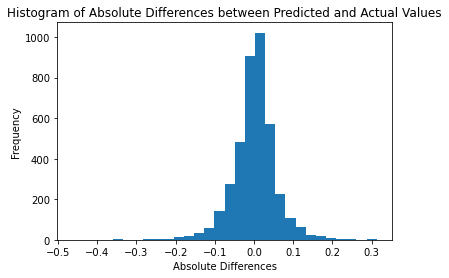

In [81]:
# Create a histogram of the differences
plt.hist(differences, bins=30)  # You can adjust the number of bins as needed
plt.xlabel('Absolute Differences')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Differences between Predicted and Actual Values')
plt.show()

In [82]:
mean_difference = np.mean(differences)
std_deviation = np.std(differences)
mean_difference,std_deviation

(0.001128878, 0.05593512)

In [ ]:
#what if it never sees the same data? don't need new val data, just new training data.  